Date: Feb. 5, 2017
By: Ford Fowler

## About the Data:

Describes student enrollment and student demographics of each school in New York City.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/School_Demographics_and_Accountability_Snapshot_2006-2012.csv', sep=',')
df = df.replace('.', np.nan)

sample = random.sample(range(len(df)), 5)
df.loc[sample]

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6580,20K259,JHS 259 WILLIAM MCKINLEY,20112012,NaN,81.9,1469,,,,,...,29,2.0,400,27.2,397,27.0,789.0,53.7,680.0,46.3
5397,16K243,PS 243 WEEKSVILLE,20092010,,92.1,363,36,46,62,62,...,285,78.5,61,16.8,1,0.3,179.0,49.3,184.0,50.7
6867,21K410,ABRAHAM LINCOLN HIGH SCHOOL,20092010,,55.4,2533,NaN,NaN,NaN,NaN,...,907,35.8,540,21.3,633,25.0,1421.0,56.1,1112.0,43.9
2787,09X126,PS 126 DR MARJORIE H DUNBAR,20092010,,96.1,773,36,99,90,89,...,217,28.1,542,70.1,3,0.4,404.0,52.3,369.0,47.7
8974,29Q134,PS 134 HOLLIS,20112012,NaN,81.2,508,36,71,74,89,...,434,85.4,36,7.1,10,2.0,272.0,53.5,236.0,46.5


In [3]:
list(df.columns)

['DBN',
 'Name',
 'schoolyear',
 'fl_percent',
 'frl_percent',
 'total_enrollment',
 'prek',
 'k',
 'grade1',
 'grade2',
 'grade3',
 'grade4',
 'grade5',
 'grade6',
 'grade7',
 'grade8',
 'grade9',
 'grade10',
 'grade11',
 'grade12',
 'ell_num',
 'ell_percent',
 'sped_num',
 'sped_percent',
 'ctt_num',
 'selfcontained_num',
 'asian_num',
 'asian_per',
 'black_num',
 'black_per',
 'hispanic_num',
 'hispanic_per',
 'white_num',
 'white_per',
 'male_num',
 'male_per',
 'female_num',
 'female_per']

## Questions about the data:

1. Who tends to be the most segregated?
2. What is THE most segregated school?
3. How does race correlate with decrease in enrollment 9-12?
4. How does amount of ELL's(English language learners) correlate with decrease in enrollment 9-12?
5. How does segregation/diversity correlate with decrease in enrollment 9-12?

### General spread of data

In [4]:
percents = [c for c in df.columns if c.endswith('_per')]

df.loc[sample, percents]

,asian_per,black_per,hispanic_per,white_per,male_per,female_per
6580,43.7,2.0,27.2,27.0,53.7,46.3
5397,1.7,78.5,16.8,0.3,49.3,50.7
6867,16.7,35.8,21.3,25.0,56.1,43.9
2787,0.0,28.1,70.1,0.4,52.3,47.7
8974,5.3,85.4,7.1,2.0,53.5,46.5


#### medians

In [5]:
df[percents].median().sort_values()

white_per        2.4
asian_per        3.3
black_per       27.5
hispanic_per    38.4
female_per      49.0
male_per        51.0
dtype: float64

#### means

In [6]:
df[percents].mean().sort_values()

asian_per       10.975434
white_per       12.206144
black_per       34.606392
hispanic_per    41.026303
female_per      49.513648
male_per        50.486591
dtype: float64

In [7]:
df[percents].min()

asian_per       0.0
black_per       0.0
hispanic_per    0.0
white_per       0.0
male_per        0.0
female_per      0.0
dtype: float64

In [8]:
df[percents].max()

asian_per        93.7
black_per       100.0
hispanic_per    100.0
white_per       100.0
male_per        100.0
female_per      100.0
dtype: float64

#### standard deviations

In [9]:
df[percents].std().sort_values()

female_per       8.165283
male_per         8.165368
asian_per       16.548657
white_per       19.332195
hispanic_per    25.745743
black_per       28.474049
dtype: float64

### Finding most segregated racial group

If I'm interpreting this correctly, then Black students are the most segregated racial group in New York City schools, meaning they are often a small percentage of the school or a relatively large percentage of the school. Asian students are the least commonly segregated racial group.

### Finding the most segregated school

In [10]:
racial_group_pers = ['asian_per', 'black_per', 'hispanic_per', 'white_per']
df['segr'] = df[racial_group_pers].std(axis=1)
segregated = df[df['segr'] == max(df['segr'])]
segregated[['Name', 'total_enrollment'] + percents]

,Name,total_enrollment,asian_per,black_per,hispanic_per,white_per,male_per,female_per
693,SEWARD PARK HS,1,0.0,100.0,0.0,0.0,100.0,0.0
771,MANHATTAN BRIDGES HIGH SCHOOL,509,0.0,0.0,100.0,0.0,53.8,46.2
1067,MS 247M DUAL LANGUAGE MID. SCH,165,0.0,0.0,100.0,0.0,52.1,47.9
1373,MANHATTAN INSTITUTE FOR ACADEMIC & VISUAL ARTS,3,0.0,0.0,100.0,0.0,66.7,33.3
1731,I S 090 MIRABEL SISTERS,2,0.0,0.0,100.0,0.0,50.0,50.0
1782,JHS 164 EDWARD W STITT,2,0.0,100.0,0.0,0.0,50.0,50.0
1927,HARBOR HEIGHTS,179,0.0,0.0,100.0,0.0,52.5,47.5
1928,HARBOR HEIGHTS,158,0.0,0.0,100.0,0.0,50.0,50.0
1929,HARBOR HEIGHTS,158,0.0,0.0,100.0,0.0,52.5,47.5
1930,HARBOR HEIGHTS,164,0.0,0.0,100.0,0.0,54.3,45.7


In [11]:
segregated = segregated[segregated.total_enrollment > 10]
len(set(segregated['DBN']))

7

There are 7 completely segregated schools in NYC with more than 10 enrolled students.

In [12]:
segregated = segregated[segregated.total_enrollment > 10]
len(set(segregated[segregated.hispanic_per == 100.0]['DBN']))

7

7 out of 7 are completely hispanic.

## Decrease in Enrollment from 9th to 12th and any correlations

In [13]:
high_schools = df[['Name', 'total_enrollment'] + list(df.columns[16:])]
high_schools = high_schools.replace('    ', np.NaN).dropna()
high_schools.head()

,Name,total_enrollment,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,...,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,segr
94,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,515,109,82,67,56,52.0,10.1,124.0,24.1,...,30.7,272,52.8,12,2.3,281.0,54.6,234.0,45.4,22.484865
95,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,470,97,85,60,53,50.0,10.6,118.0,25.1,...,29.4,264,56.2,14,3.0,264.0,56.2,206.0,43.8,23.813931
96,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,511,109,89,87,55,81.0,15.9,112.0,21.9,...,27.6,290,56.8,16,3.1,297.0,58.1,214.0,41.9,23.911835
97,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,448,107,85,67,69,97.0,21.7,106.0,23.7,...,28.1,255,56.9,9,2.0,267.0,59.6,181.0,40.4,23.891473
98,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,422,98,79,80,50,94.0,22.3,105.0,24.9,...,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6,22.432491


Note: There are a lot of potential reasons for a decrease in enrollment from 9th to 12th grades, not only students dropping out. But I need something to work with, gotta get those points.

I'll make the stat a percentageish decrease from grade 9 to 12.

In [14]:
grade9, grade12 = pd.to_numeric(high_schools.grade9), pd.to_numeric(high_schools.grade12)
high_schools['enroll_decrease'] = (grade9 - grade12) / (grade9 + grade12)
sorteded = high_schools[high_schools['total_enrollment'] > 1000].sort_values('enroll_decrease')
pd.concat((sorteded[60:63],sorteded.tail(3)))

,Name,total_enrollment,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,...,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,segr,enroll_decrease
680,BAYARD RUSTIN EDUCATIONAL COMPLEX,1727,497,474,309,447,440.0,25.5,215.0,12.4,...,1025,59.4,43,2.5,863.0,50.0,864.0,50.0,25.391665,0.052966
9855,TOTTENVILLE HIGH SCHOOL,3848,1004,1028,916,900,59.0,1.5,453.0,11.8,...,348,9.0,3155,82.0,1930.0,50.2,1918.0,49.8,38.257929,0.054622
8178,FRANCIS LEWIS HIGH SCHOOL,4443,1124,1238,1087,994,504.0,11.3,433.0,9.7,...,1075,24.2,738,16.6,2172.0,48.9,2271.0,51.1,16.518374,0.061379
875,NORMAN THOMAS HIGH SCHOOL,2137,1055,664,294,124,377.0,17.6,281.0,13.1,...,1488,69.6,27,1.3,1091.0,51.1,1046.0,48.9,31.832164,0.789652
4996,AUTOMOTIVE HIGH SCHOOL,1118,573,360,126,59,72.0,6.4,170.0,15.2,...,382,34.2,23,2.1,1060.0,94.8,58.0,5.2,27.666632,0.813291
4995,AUTOMOTIVE HIGH SCHOOL,1055,592,284,126,53,64.0,6.1,205.0,19.4,...,419,39.7,18,1.7,990.0,93.8,65.0,6.2,27.040510,0.835659


### Is there a correlation between segregation and decrease in high school enrollment?

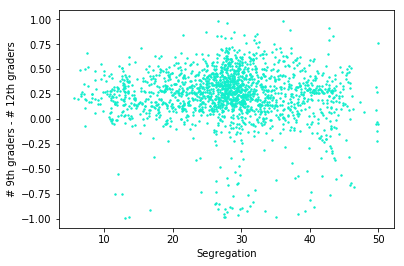

In [15]:
enroll_decrease = high_schools['enroll_decrease']
x = high_schools['segr']
plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Segregation')
plt.scatter(x, enroll_decrease, color='#11EECC', s=2)
plt.show()

In [16]:
high_schools[['segr', 'enroll_decrease']].corr()

,segr,enroll_decrease
segr,1.000000,-0.055271
enroll_decrease,-0.055271,1.000000


Nope, doesn't appear so.
### Is there a correlation between decrease in enrollment and race?

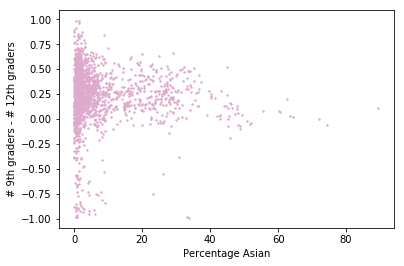

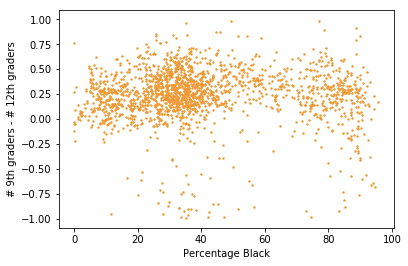

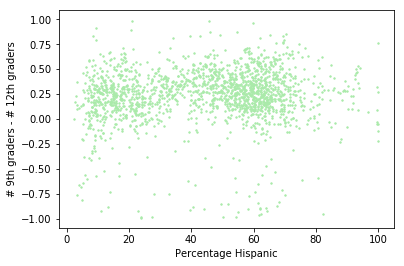

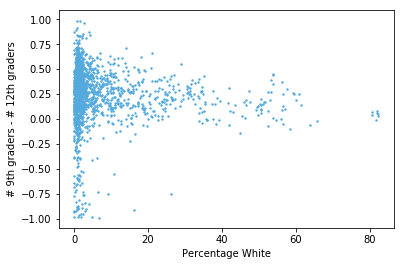

In [17]:
enroll_decrease = high_schools['enroll_decrease']
s1 = high_schools['asian_per']
s2 = high_schools['black_per']
s3 = high_schools['hispanic_per']
s4 = high_schools['white_per']

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage Asian')
plt.scatter(s1, enroll_decrease, color='#DDAACC', s=2)
plt.show()

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage Black')
plt.scatter(s2, enroll_decrease, color='#EE9933', s=2)
plt.show()

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage Hispanic')
plt.scatter(s3, enroll_decrease, color='#AAEAAA', s=2)
plt.show()

plt.ylabel('# 9th graders - # 12th graders')
plt.xlabel('Percentage White')
plt.scatter(s4, enroll_decrease, color='#55AADD', s=2)
plt.show()

In [18]:
high_schools[['enroll_decrease'] + percents].corr()['enroll_decrease']

enroll_decrease    1.000000
asian_per         -0.064343
black_per         -0.020832
hispanic_per       0.084845
white_per         -0.076434
male_per          -0.019696
female_per         0.019710
Name: enroll_decrease, dtype: float64

Looking at the plots, it appears that with higher percentages of White and Asian students, there might be a decrease in enrollment...decrease. With Black and Hispanic students, it's a bit chaotic.

However, the calculated correlations indicate there's nothing to see here, all the correlations are insignificant.

### Is there a correlation between number of English language learners and enrollment?

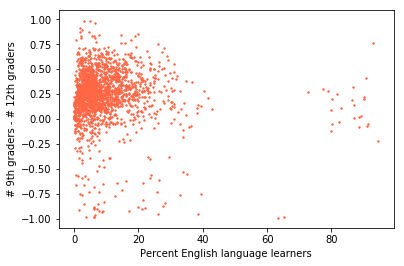

In [19]:
x = high_schools['ell_percent']
plt.xlabel('Percent English language learners')
plt.ylabel('# 9th graders - # 12th graders')
plt.scatter(x, enroll_decrease, color='#FF6644', s=2)
plt.show()

In [20]:
high_schools[['ell_percent', 'enroll_decrease']].corr()

,ell_percent,enroll_decrease
ell_percent,1.000000,-0.065263
enroll_decrease,-0.065263,1.000000


Again, it doesn't look as if there's a correlation.